In [1]:
setwd('/Users/alexis/IEHS Dropbox/Rager Lab/Alexis_Payton/Experiments/3. Plasma Microvesicles/Input')
cur_date = "072821"

library(readxl)
library(tidyverse)
library(reshape2)

#reading in files
exp_details = data.frame(read_excel("Experiment_Details_052521.xlsx"))
mrna_details = data.frame(read_excel("MRNA_Details_052521.xlsx"))
mirna_details = data.frame(read_excel("MiRNA_Details_052521.xlsx"))
lipid_details = data.frame(read_excel("lipid_Details_072821.xlsx"))
protein_functions = data.frame(read_excel("Protein Functions.xlsx", sheet = 1))
mirna_functions = data.frame(read_excel("miRNA Functions.xlsx", sheet = 1))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [2]:
#first combining all these files 
mrna_data = inner_join(exp_details, mrna_details) %>%
    #removing variables that aren't necessary 
    select(-c('EXPERIMENT.DESCRIPTION', 'CONTENT.ID'))
head(mrna_data)

mirna_data = inner_join(exp_details, mirna_details) %>%
    #removing variables that aren't necessary 
    select(-c('EXPERIMENT.DESCRIPTION', 'CONTENT.ID'))
head(mirna_data)

lipid_data = inner_join(exp_details, lipid_details, by = c("EXPERIMENT.ID", "SPECIES")) %>%
    #removing variables that aren't necessary 
    select(-c('EXPERIMENT.DESCRIPTION', 'CONTENT.ID'))
head(lipid_data)

Joining, by = c("EXPERIMENT.ID", "SPECIES", "METHODS")



,EXPERIMENT.ID,PUBMED.ID,SPECIES,SAMPLE.NAME,IDENTIFICATIONS,METHODS,YEAR,ISOLATION.METHOD,VESICLE.TYPE,CONTENT.TYPE,ENTREZ.GENE.ID,GENE.SYMBOL
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,43,17076679,Homo sapiens,Plasma - Pregnant and not-pregnant women,Protein,Western blotting,2006,"Size exclusion chromatography|Ultracentrifugation|Immunobeads (CD3, CD19, CD56, CD83, PLAP)",Exosomes,protein,250,ALPP
2,43,17076679,Homo sapiens,Plasma - Pregnant and not-pregnant women,Protein,Western blotting,2006,"Size exclusion chromatography|Ultracentrifugation|Immunobeads (CD3, CD19, CD56, CD83, PLAP)",Exosomes,protein,356,FASLG
3,43,17076679,Homo sapiens,Plasma - Pregnant and not-pregnant women,Protein,Western blotting,2006,"Size exclusion chromatography|Ultracentrifugation|Immunobeads (CD3, CD19, CD56, CD83, PLAP)",Exosomes,protein,29126,CD274
4,68,19619303,Homo sapiens,Plasma - Ovarian cancer,Protein,Western blotting,2009,Differential centrifugation,Exosomes,protein,1364,CLDN4
5,199,21609964,Homo sapiens,Plasma - Normal,Protein,Western blotting,2011,Differential centrifugation|Filtration,Exosomes,protein,928,CD9
6,353,24115447,Homo sapiens,Plasma - Normal,Protein,Mass spectrometry [Orbitrap Velos]|Western blotting,2013,Differential centrifugation|Filtration|Ultracentrifugation,Exosomes,protein,7037,TFRC


Joining, by = c("EXPERIMENT.ID", "SPECIES", "METHODS")



,EXPERIMENT.ID,PUBMED.ID,SPECIES,SAMPLE.NAME,IDENTIFICATIONS,METHODS,YEAR,ISOLATION.METHOD,VESICLE.TYPE,CONTENT.TYPE,MIRNA.ID,Entrez.GENE.ID,COMMENTS
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,325,19289371,Homo sapiens,Plasma - Lung adenocarcinoma patients,miRNA,Microarray,2009,Size exclusion chromatography|Immunobeads (EpCAM),Exosomes,mirna,miR-17-3p,406952,Ambiguous mapping to Entrez gene ID
2,325,19289371,Homo sapiens,Plasma - Lung adenocarcinoma patients,miRNA,Microarray,2009,Size exclusion chromatography|Immunobeads (EpCAM),Exosomes,mirna,miR-21,406991,Clear hit to Entrez gene ID
3,325,19289371,Homo sapiens,Plasma - Lung adenocarcinoma patients,miRNA,Microarray,2009,Size exclusion chromatography|Immunobeads (EpCAM),Exosomes,mirna,miR-106a,406899,Clear hit to Entrez gene ID
4,325,19289371,Homo sapiens,Plasma - Lung adenocarcinoma patients,miRNA,Microarray,2009,Size exclusion chromatography|Immunobeads (EpCAM),Exosomes,mirna,miR-146,NOTFOUND,NOTFOUND
5,325,19289371,Homo sapiens,Plasma - Lung adenocarcinoma patients,miRNA,Microarray,2009,Size exclusion chromatography|Immunobeads (EpCAM),Exosomes,mirna,miR-155,406947,Clear hit to Entrez gene ID
6,325,19289371,Homo sapiens,Plasma - Lung adenocarcinoma patients,miRNA,Microarray,2009,Size exclusion chromatography|Immunobeads (EpCAM),Exosomes,mirna,miR-191,406966,Clear hit to Entrez gene ID


,EXPERIMENT.ID,PUBMED.ID,SPECIES,SAMPLE.NAME,IDENTIFICATIONS,METHODS.x,YEAR,ISOLATION.METHOD,VESICLE.TYPE,CONTENT.TYPE,LIPID.ID,METHODS.y
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1196,27883272,Homo sapiens,Two weeks before bariatric surgery,miRNA|Metabolites,Microarray,2017,ExoQuick,Exosomes,lipid,Glutamine,Mass spectrometry
2,1196,27883272,Homo sapiens,Two weeks before bariatric surgery,miRNA|Metabolites,Microarray,2017,ExoQuick,Exosomes,lipid,Glutamic acid,Mass spectrometry
3,1196,27883272,Homo sapiens,Two weeks before bariatric surgery,miRNA|Metabolites,Microarray,2017,ExoQuick,Exosomes,lipid,Glycine,Mass spectrometry
4,1196,27883272,Homo sapiens,Two weeks before bariatric surgery,miRNA|Metabolites,Microarray,2017,ExoQuick,Exosomes,lipid,Leucine and Isoleucine,Mass spectrometry
5,1196,27883272,Homo sapiens,Two weeks before bariatric surgery,miRNA|Metabolites,Microarray,2017,ExoQuick,Exosomes,lipid,Branched chain aminoacids,Mass spectrometry
6,1197,27883272,Homo sapiens,One year after bariatric surgery,miRNA|Metabolites,Microarray,2017,ExoQuick,Exosomes,lipid,Glutamine,Mass spectrometry


# What molecules have been identified the most frequently?

In [3]:
mrna_count = mrna_data %>%
    #just for humans
    filter(SPECIES == 'Homo sapiens') %>%
    group_by(GENE.SYMBOL) %>%
    count() %>%
    arrange(-n) %>%
    filter(n >= 10) #just plotting the most frequent mrnas (>= 10)
head(mrna_count)

mirna_count = mirna_data %>%
    #just for humans
    filter(SPECIES == 'Homo sapiens') %>%
    group_by(MIRNA.ID) %>%
    count() %>%
    arrange(-n) %>%
    filter(n >= 2) #just plotting the most frequent mrnas (>= 10)
head(mirna_count)

lipid_count = lipid_data %>%
    #just for humans
    filter(SPECIES == 'Homo sapiens') %>%
    group_by(LIPID.ID) %>%
    count() %>%
    arrange(-n) 
head(lipid_count)

GENE.SYMBOL,n
<chr>,<int>
FGA,14
HPR,13
PECAM1,13
ALB,12
C1QC,12
FGG,12


MIRNA.ID,n
<chr>,<int>
miR-103,4
let-7a,3
miR-142-3p,3
RNU6B,2
miR-106a,2
miR-148b,2


LIPID.ID,n
<chr>,<int>
Phosphatidylserine (PS),7
Branched chain aminoacids,2
Glutamic acid,2
Glutamine,2
Glycine,2
Leucine and Isoleucine,2


In [4]:
#combining into one df
mrna_count$Molecule = rep("mRNA", times = length(mrna_count$GENE.SYMBOL))
mirna_count$Molecule = rep("miRNA", times = length(mirna_count$MIRNA.ID))
lipid_count$Molecule = rep("Lipid", times = length(lipid_count$LIPID.ID))
molecule_count = rbind(mrna_count %>%
                           rename(ID = GENE.SYMBOL), 
                       mirna_count %>%
                           rename(ID = MIRNA.ID), 
                       lipid_count %>%
                           rename(ID = LIPID.ID))
head(molecule_count)

ID,n,Molecule
<chr>,<int>,<chr>
FGA,14,mRNA
HPR,13,mRNA
PECAM1,13,mRNA
ALB,12,mRNA
C1QC,12,mRNA
FGG,12,mRNA


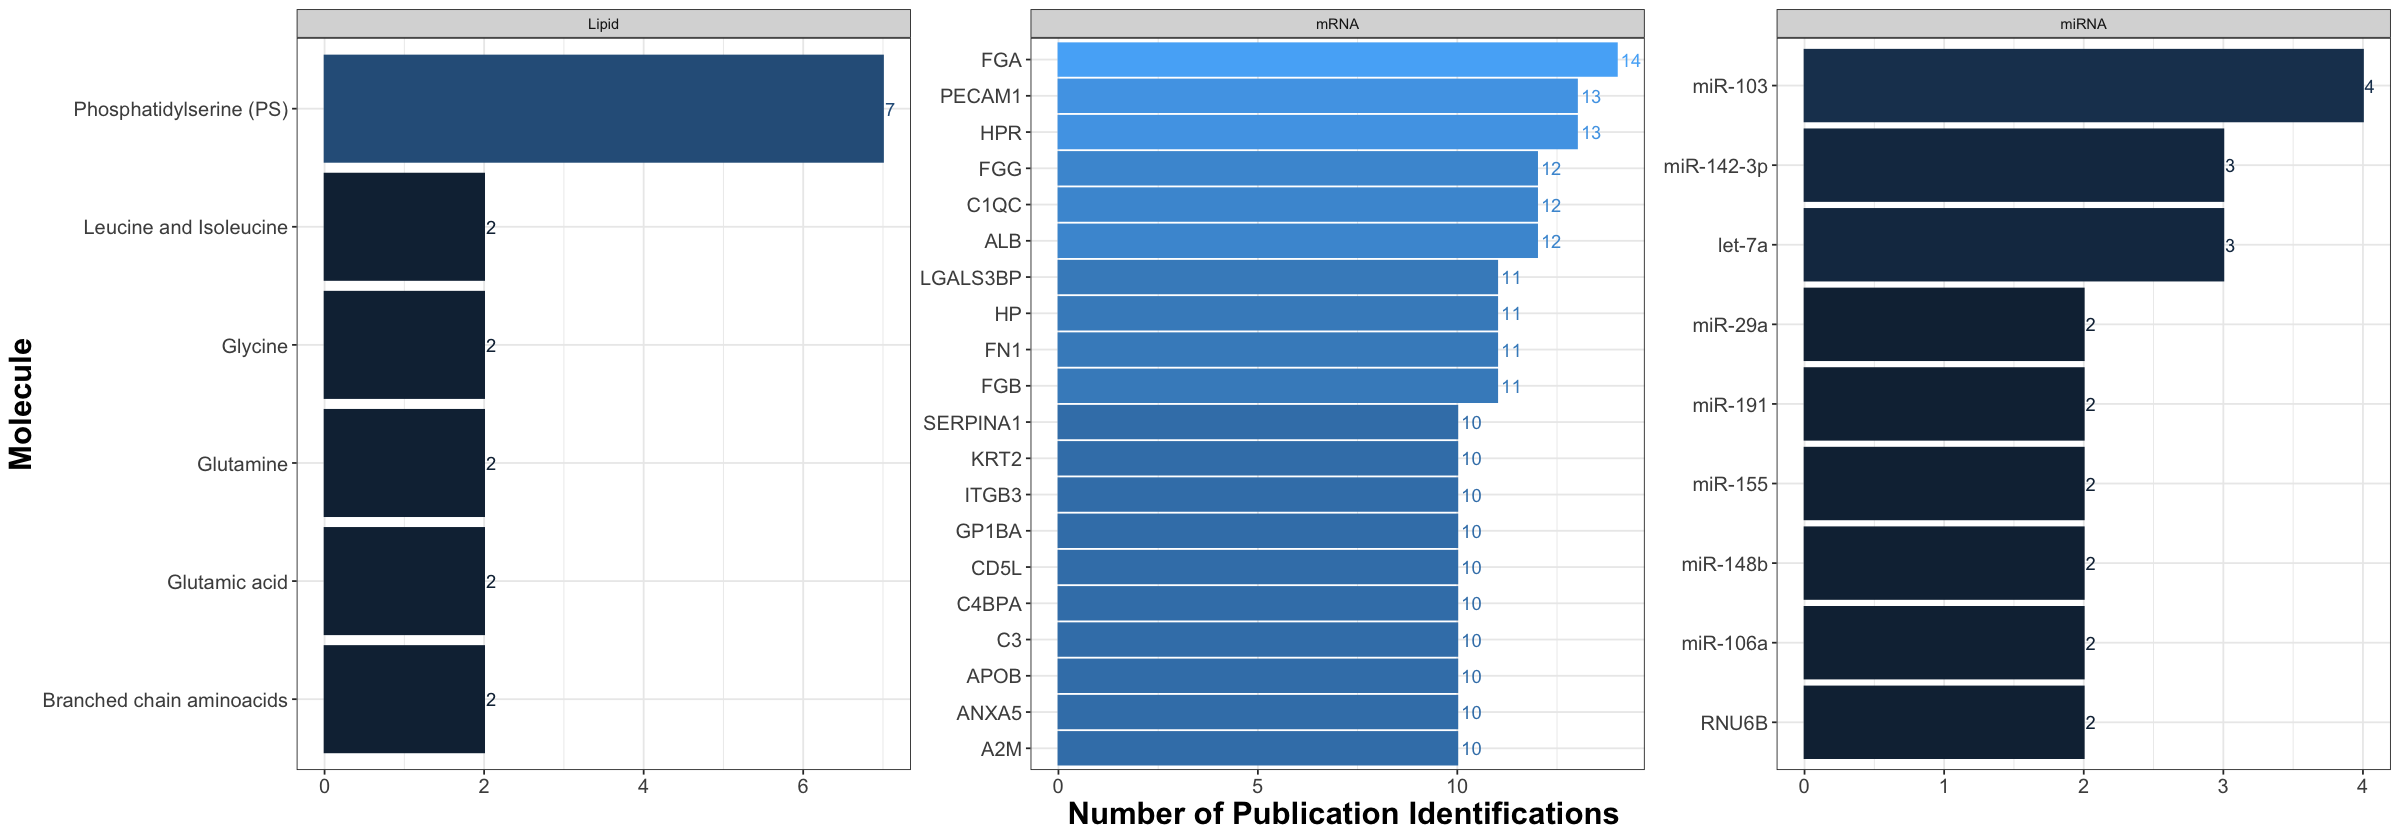

In [5]:
#grouped by number of identifications
options(repr.plot.width=20, repr.plot.height=7) #changing size
molecule_publications_graph = ggplot(data = molecule_count, aes(x = n, y = reorder(ID, n), 
                              color = n, fill = n)) + 
  geom_col() + 
  geom_text(aes(label = n), position = position_dodge(width = 0.9), hjust = -0.2) + 

  facet_wrap(~Molecule, scales = "free") +

  theme_bw() + #changing theme
  theme(axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        #axis.title.x = element_text(vjust = 22), #need this in order to not have space in patchwork
        legend.position = "none") + #remvoing legend
  labs(y = 'Molecule', x = "Number of Publication Identifications")

molecule_publications_graph